4/4 [==============================] - 0s 4ms/step


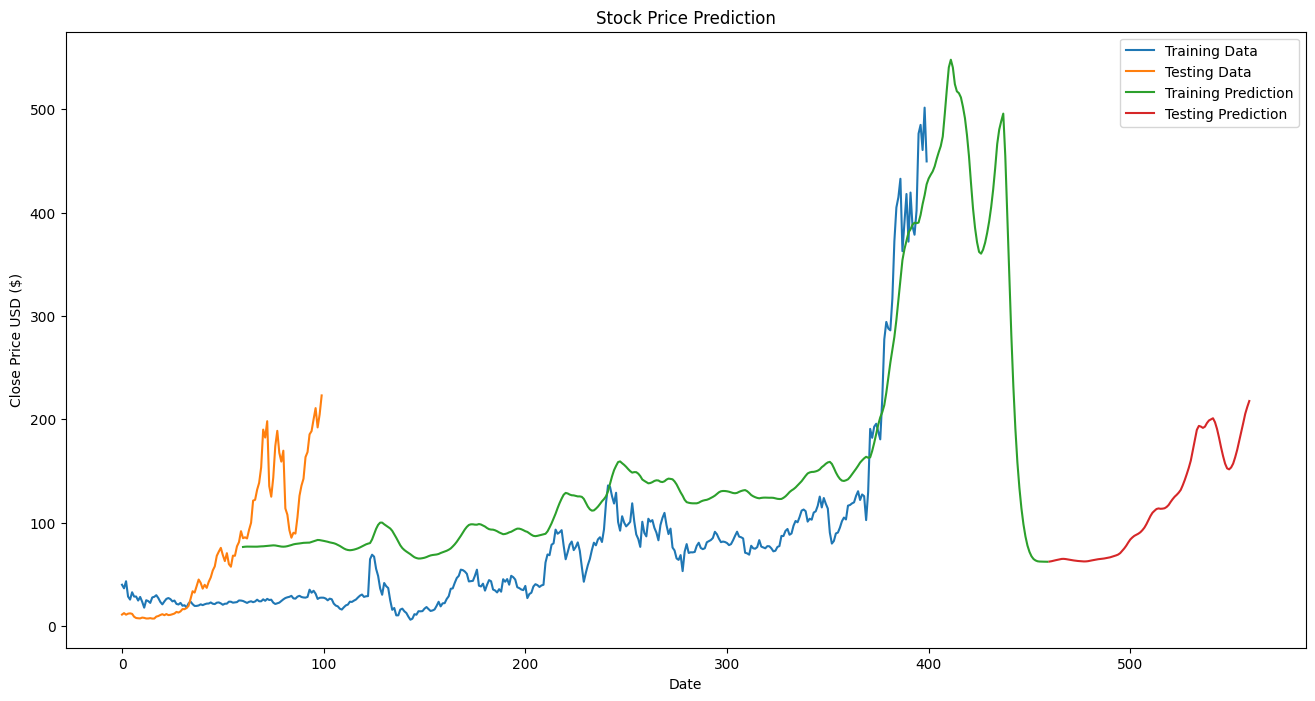

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('C:\\Users\\nagur\\Downloads\\stocks.csv')
data['date'] = pd.to_datetime(data['date'])  # Ensure the 'date' column is in datetime format
data.set_index('date', inplace=True)

# Extract the 'price' column as the target variable
close_prices = data['price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

# Create sequences for the LSTM model
sequence_length = 60  # You can adjust this window size
X, y = [], []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)  # You can adjust batch_size and epochs

# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot the predictions
train_data = close_prices[:train_size]
test_data = close_prices[train_size + sequence_length:]

train_predict_plot = np.empty_like(close_prices)
train_predict_plot[:,:] = np.nan
train_predict_plot[sequence_length:train_size+sequence_length, :] = train_predict

test_predict_plot = np.empty_like(close_prices)
test_predict_plot[:,:] = np.nan
test_predict_plot[train_size+sequence_length:len(close_prices), :] = test_predict

plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(train_predict_plot, label='Training Prediction')
plt.plot(test_predict_plot, label='Testing Prediction')
plt.legend()
plt.show()
